# Fundamentals of Data Analysis Tasks

This is the Github repository for my submission for the Fundamentals of Data Analysis tasks assignment.

## Task 1: Counts function

This task requires a function to be written that takes a list of elements as an argument and returns a dictionary which counts how many times each unique element occurs.

The ***counts()*** function first takes an argument called *listArgument* and declares an empty dictionary called *elementCount*. The **for** loop beginning on line 10 will use this list/array to populate *elementCount* with keys.

The code for the **for** loop was adapted from an answer given to [this Stack Overflow question](https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list) [1]. The loop iterates through all the elements in *listArgument*, treating each element as a potential dictionary key (hence the iterator in the **for** statement being labelled "key"). For each element in the *listArgument* list, the [**get()** dictionary function](https://www.w3schools.com/python/ref_dictionary_get.asp) [2] checks if that element exists as a key in the *elementCount* dictionary. If it is not found, the key is added and its value set to the supplied default value of 0. The value of the key is then incremented by 1. On the next iteration, a second instance of the key is found and its value in the dictionary is incremented by 1 again. If another unique list item is found, another key is added to *elementCount* and its value set to 0 and then incremented by 1.

Finally, once all elements in *listArgument* have been iterated over, the ***counts()*** function returns the *elementCount* dictionary to the terminal, showing all the list elements passed as keys and their incidence count as values.

***

In [16]:
list1 = ['A', 'A', 'B', 'C', 'A', 'F', 'F']

def counts(listArgument):
    # TODO:
    # count the number of times each unique element appears in the list
    # save element as a dict key, save number of times each one repeats as a value
    
    elementCount = {} # declaring the empty dictionary
    
    for key in listArgument:
        elementCount[key] = elementCount.get(key, 0) + 1
        # the for loop iterates through the elements in listArgument
        # for each element in the list, it runs the get() method to check if it exists in the dictionary
        # the get() method takes a key and a default return value as arguments
        # if the key is not found in the dict, it is added with the value set to 0
        # the value of that key is then incremented by 1
    
    return elementCount # returns the elementCount dicitonary to the terminal

counts(list1)

{'A': 3, 'B': 1, 'C': 1, 'F': 2}

[1] Using a dictionary to count the items in a list - https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list

[2] Python Dictionary get() Method - https://www.w3schools.com/python/ref_dictionary_get.asp

***

## Task 2: Dicerolls function

This task builds on the previous one by having the dictionary keys track the number of possible results from simulated dicerolls.

The function takes two integer variables as arguments: *k*, the number of dice to be thrown in each round of the simulation, and *n*, the number of rounds. In each round, the results of the dicerolls are summed and this summed result is added as a dictionary key. If the same result is returned in subsequent rounds, the value for that result key is incremented by 1 using the code from task 1.

The code first initiates a random number generator variable using the ***np.random.default_rng()*** function from the numpy.random package. This random number generator is used to produce values of 1-6 for each of *k* dice rolled in each of *n* rounds. This takes place on line 22.

The ***dicerolls*** function first declares an empty list called *roundTotals*, which tracks the summed total values of each round. This list will serve the same purpose as *listArgument* in task 1, supplying the **for** loop on line 49 with elements to be passed to a dictionary.

The function then initiates two nested **for** loops: the inner loop calculates the diceroll results for each individual round, and the outer loop takes the result of each round and adds it to the *roundTotals* list, then initiates the next round of calculations.

Line 22 generates the result of one dice roll using the ***numpy.integers()*** function with lower and upper values set to 1 and 7 respectively, and saves the result to the *faceValue* variable. The value of *faceValue* is passed to the *dicerollRoundValues* list (using the ***numpy.append()*** function), which is declared on line 19. This process is repeated *k* times to get the results of all dice thrown in one round.
>     faceValue = rng.integers(1,7)
>     dicerollRoundValues.append(faceValue)

On line 28 (in the outer **for** loop) the total value of the round is found using the **numpy.sum()** function, and this value is saved to the *roundTotal* variable. The value of *roundValue* is then appended to the *roundtotals* list.
>        dicerollRoundValues = []
>        ... (inner loop)
>        roundTotal = np.sum(dicerollRoundValues)
>        roundTotals.append(roundTotal)

This completes one iteration of the outer **for** loop. This loop iterates *n* times, generating a list of total values for all rounds of the simulation. For clarity, this list of all round totals is printed to the terminal on line 35.
>        print("Round totals: \n" + str(roundTotals) + "\n")


The ***dicerolls*** function then creates a list of all possible results for a given set of argument parameters, called *possibleTotals*. This takes place on line 41. This list will be used to populate the dictionary of results in the function's final output. The lower and upper limits of this list are already known for a given number of dice (1 * k and 6 * k respectively), so these values are generated as integer variables and passed to a ***range()*** function. This is nested inside a ***list()*** function to generate the *possibleTotals* list:
>     possibleTotals = list(range(lowestTotal, (highestTotal + 1)))

The code for defining the limits of the list was adapted from an answer to [this Stack Overflow question](https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values).[1]

The function next declares the empty *totalsFrquency* dictionary. This will track the frequency of each possible total for the simulation.

Another **for** loop is initiated which populates *totalsFrequency* with the possible total values generated on line 41, using the code from task 1. This loop iterates over the values in *possibleTotals* and adds each one as a key to *totalsFrequency*. All values for this dictionary are set to 0, as the round results are not being added yet.
>        for key in possibleTotals:
>           totalsFrequency[key] = totalsFrequency.get(key, 0)

Next, *totalsFrequency* is populated with the round results stored in the *roundTotals* list. The loop iterates over *roundTotals* and when each unique result is found, the value of the corresponding key is incremented by 1.
>        for key in roundTotals:
>           totalsFrequency[key] = totalsFrequency.get(key, 0) + 1

Finally, *totalsFrequency* is printed to the terminal, giving the possible total values for each round of the simulation and the number of times each total was returned.
>        print("Frequency of totals values: \n" + str(totalsFrequency))

***

In [19]:
import numpy as np

rng = np.random.default_rng() # random number generator

def dicerolls(k, n):
    # TODO:
    # k = number of dice, n = number of rolls
    # randomly choose a value of 1-6 k times, repeat this n times
    # find the total value of each round and save to a dictionary as keys, frequency as values
    # use the code from Task 1 to generate the dictionary
    
    # dicerollValues = [] # declaring the empty list of all diceroll results
    
    roundTotals = [] # list of total values for each round
    
    
    for i in range(n): # for loop to calculate the values produced in all rounds
        
        dicerollRoundValues = []
        
        for j in range(k): # for loop to calculate the values produced in each round
            faceValue = rng.integers(1,7)
            # runs the integers() numpy function to generate a random integer between the limits
            # (non-inclusive for upper limit)
            dicerollRoundValues.append(faceValue) # appends the result of each die to the list
            # dicerollValues.append(faceValue) # appends the result of each die to the list of all rolls
            
        roundTotal = np.sum(dicerollRoundValues)
        roundTotals.append(roundTotal)
        
        # print("Results in round " + str(roundNum) + ":" + "\n" + str(dicerollRoundValues)) # prints results of each round
        # print("Total  in round " + str(roundNum) + ":" + "\n" + str(roundTotal))
        # prints total value of each round using the sum() function, which takes an array as argument
        
    print("Round totals: \n" + str(roundTotals) + "\n")
    
    
    # setting the limits of possible values for the number of dice
    lowestTotal = 1*k
    highestTotal = 6*k
    possibleTotals = list(range(lowestTotal, (highestTotal + 1)))
    # print("Possible totals: \n" + str(possibleTotals) + "\n")
    
    totalsFrequency = {}
    
    for key in possibleTotals:
        totalsFrequency[key] = totalsFrequency.get(key, 0)
    
    for key in roundTotals:
        totalsFrequency[key] = totalsFrequency.get(key, 0) + 1
    print("Frequency of totals values: \n" + str(totalsFrequency))
    
    # return dicerollValues # returns the list of the first round of dicerolls
    # return totalsFrequency

dicerolls(4, 100)

Round totals: 
[13, 13, 15, 16, 14, 18, 19, 16, 13, 13, 15, 11, 22, 16, 17, 9, 13, 21, 9, 18, 16, 19, 10, 17, 9, 16, 10, 20, 16, 19, 14, 13, 13, 9, 12, 17, 16, 17, 14, 16, 9, 16, 14, 22, 15, 14, 10, 13, 18, 10, 12, 17, 11, 15, 16, 16, 18, 9, 18, 14, 13, 22, 19, 21, 16, 15, 14, 15, 11, 12, 11, 19, 13, 13, 15, 13, 15, 16, 24, 15, 9, 10, 7, 11, 15, 12, 19, 18, 20, 13, 18, 14, 15, 12, 10, 11, 11, 14, 15, 14]

Frequency of totals values: 
{4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 7, 10: 6, 11: 7, 12: 5, 13: 13, 14: 10, 15: 12, 16: 13, 17: 5, 18: 7, 19: 6, 20: 2, 21: 2, 22: 3, 23: 0, 24: 1}


[1] Python - Create list with numbers between 2 values? - https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values

***

## Task 3: Coinflip function and plot

This task simulates flipping 100 coins repeated for 100 rounds, saves the number of heads per round to a list, then uses the list to generate a plot of the distribution of results, showing that the results follow a normal distribution.

The code first imports numpy and seaborn, then initiates a random number generator variable as in the previous task.

It then declares the empty headsList and roundList arrays. The first will track the number of heads results out of 100 coinflips in each round of the simulation; the second will have the contents of headsList appended to it in each round.

The roundsCount variable is also declared and set to 0. This will be the counter which is incremented in the **while** loop.

The **while** loop runs the ***numpy.random.binomial()*** function, with the number of coins set to 100 and the probability set 0.5, giving each outcome a 50% chance of occurring. The result is added to *headsList*. The *roundsCount* variable is then incremented by 1, and the contents of *headsList* are appended to *roundList*. The **while** loop runs until *roundsCount* reaches 1000. I checked this code against the examples given in [this article](https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/) [1] to confirm that the results being produced were as expected.

Finally, ***seaborn.distplot()*** is called and *roundList* passed to it as an argument, and the "bins" parameter set to 10. The resulting distribution plot shows that the results of the binomial function being run 1000 times roughly describes a normal distribution. This conforms to the **central limit theorem**, which predicts that the distriution of random samples tends toward a normal distribution as the number of samples increases.

***

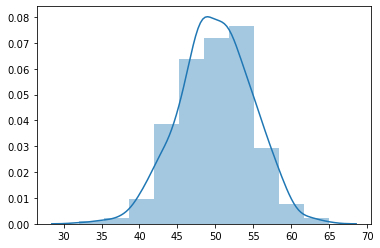

In [6]:
# TODO:
# simulate 100 coinflips
# do for 1000 rounds
# track number of heads results in each round
# plot results to show the bell-shaped curve

import numpy as np
import seaborn as sns

rng = np.random.default_rng()

headsList = [] # tracks heads results in each round
roundList = [] # tracks heads results in all rounds
roundsCount = 0 # while loop counter

while roundsCount < 1000:
    headsList = rng.binomial(100, 0.5) # flipping 100 coins, p=0.5 => two outcomes of equal probability
    roundsCount = roundsCount + 1
    roundList.append(headsList)

# print(roundList) # used to test results

sns.distplot(roundList, bins=10)

[1] Simulating Coin Toss Experiment in Python with NumPy - https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

***

## Task 4: Simpson's paradox plot

This task uses Matplotlib scatterplots to demonstrate Simpson's paradox, which describes situations where several independent groups demonstrating a trend in one direction show a trend in the opposite direction when treated as a single group.

The code first imports ***numpy*** for generating random noise variables in the coordinate data, and ***matplotlib.pyplot*** to generate the scatterplots. Some plot styling code is also used on lines 11-12.

The code generates each of the four datasets individually, using the code from [this Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb) [1] as a basis.

The variables for the X and Y coordinates are declared as setOneX and setOneY respectively, and the ***numpy.linspace()*** function is used to generate datapoints at set increments for setOneX. The Y-axis coordinates are derived using the *y = mx + c* formula, with the ***numpy.random.normal()*** function being used to add random noise data. The coefficients for the best-fit line produced by the dataset are then found using the ***numpy.polyfit()*** function, and the ***matplotlib.pyplot.plot()*** function is used to generate the scatterplot and best-fit line for that dataset. This process is repeated for all four datasets. The lines for each dataset show an upward trend of varying degrees.

On lines 54-55, the four datasets are combined into one set of X-axis coordinates and one set of Y-axis coordinates using the ***numpy.concatenate()*** function, called combinedX and combinedY respectively. The coefficient for this combined dataset is also found and is used to generate the best-fit line.

As shown in the resulting plot, the combined dataset shows a downward trend, reversing the upward trends of the individual datasets, thus demonstrating Simpson's paradox.

***

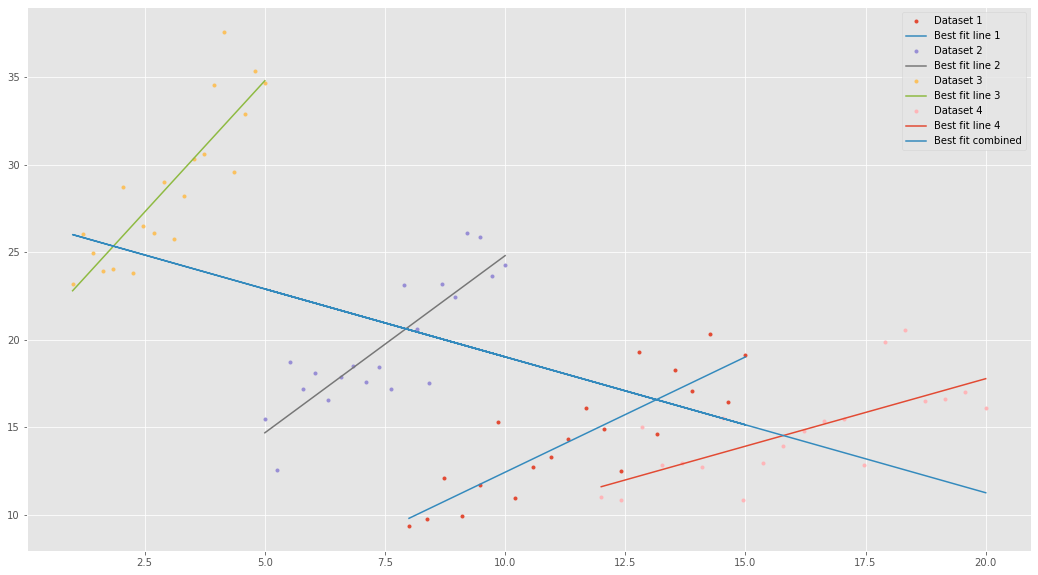

In [9]:
# set up 4 datasets with linspace using the formula "y = a * x + b"
# populate te 4 datasets such that when plotted, they demonstrate Simpson's paradox
# i.e., that each individual dataset shows a relation in one direction,
# but when combined the sets show a relation in the opposite direction

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# styling the plots to be produced
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)


# dataset 1
# setting up the array of X co-ordinates for the first dataset
setOneX = np.linspace(8.0, 15.0, 20)

# setting up the array of Y co-ordinates for the first dataset
setOneY = 1.0 * setOneX + 3.0 + np.random.normal(0.0, 2.0, len(setOneX))

# getting the coefficients for the line produced by the first dataset
coeffsSetOne = np.polyfit(setOneX, setOneY, 1)

# plotting the first dataset with the best fit line
plt.plot(setOneX, setOneY, '.', label="Dataset 1")
plt.plot(setOneX, coeffsSetOne[0] * setOneX + coeffsSetOne[1], '-', label="Best fit line 1")
# end of dataset one


# dataset 2
setTwoX = np.linspace(5.0, 10.0, 20)
setTwoY = 2.0 * setTwoX + 5.0 + np.random.normal(0.0, 2.0, len(setTwoX))
coeffsSetTwo = np.polyfit(setTwoX, setTwoY, 1)
plt.plot(setTwoX, setTwoY, '.', label="Dataset 2")
plt.plot(setTwoX, coeffsSetTwo[0] * setTwoX + coeffsSetTwo[1], '-', label="Best fit line 2")

# dataset 3
setThreeX = np.linspace(1.0, 5.0, 20)
setThreeY = 3.0 * setThreeX + 20.0 + np.random.normal(0.0, 2.0, len(setThreeX))
coeffsSetThree = np.polyfit(setThreeX, setThreeY, 1)
plt.plot(setThreeX, setThreeY, '.', label="Dataset 3")
plt.plot(setThreeX, coeffsSetThree[0] * setThreeX + coeffsSetThree[1], '-', label="Best fit line 3")

# dataset 4
setFourX = np.linspace(12.0, 20.0, 20)
setFourY = 1.0 * setFourX + (-2.0) + np.random.normal(0.0, 2.0, len(setFourX))
coeffsSetFour = np.polyfit(setFourX, setFourY, 1)
plt.plot(setFourX, setFourY, '.', label="Dataset 4")
plt.plot(setFourX, coeffsSetFour[0] * setFourX + coeffsSetFour[1], '-', label="Best fit line 4")

# getting the co-ordinates for the best fit line for the combined datasets by concatenating them
# into single arrays of X and Y axis values
combinedX = np.concatenate([setOneX, setTwoX, setThreeX, setFourX])
combinedY = np.concatenate([setOneY, setTwoY, setThreeY, setFourY])

# doing the same with the coefficient values for the combined best fit line
combinedCoeffs = np.polyfit(combinedX, combinedY, 1)

# plotting the combined best fit line, hopefully showing a reversed combined best fit line
# compared to the direction of the individual best fit lines
plt.plot(combinedX, combinedCoeffs[0] * combinedX + combinedCoeffs[1], '-', label="Best fit combined")
plt.legend();

[1] Fitting lines - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb

***